In [ ]:
#Name=Nikita Arjun Shinde

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\HP\Downloads\owid-covid-data.csv\owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
# Basic structure
print(df.shape)

(166326, 67)


In [6]:
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [8]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.632930e+05,1.631330e+05,1.611500e+05,1.454510e+05,145487.000000,143390.000000,162535.000000,162375.000000,160398.000000,144706.000000,...,106050.000000,104595.000000,68569.000000,123664.000000,155268.000000,136253.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.536044e+06,1.157084e+04,1.156560e+04,5.766407e+04,171.137304,172.673031,29447.756785,166.431538,165.507110,509.384956,...,10.627229,32.778221,50.788710,3.027816,73.576309,0.725587,3.761302e+04,9.404336,15.967077,972.197816
std,1.543441e+07,8.442598e+04,8.257830e+04,3.021145e+05,832.251328,817.024076,51852.379656,683.021740,532.174029,784.551311,...,10.558306,13.523688,31.811788,2.450110,7.491615,0.149964,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.001000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,623.579000,0.042000,1.630000,18.580250,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.611700e+04,7.900000e+01,1.071430e+02,7.830000e+02,2.000000,2.429000,4731.521000,11.439000,18.829000,127.737500,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,2.987020e+05,1.063000e+03,1.146000e+03,7.307000e+03,20.000000,21.286000,37724.466000,101.289500,120.859750,711.954750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.451295e+08,4.206334e+06,3.444237e+06,5.995245e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6322.263000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


In [9]:
df.isnull().sum()

iso_code                                        0
continent                                    9956
location                                        0
date                                            0
total_cases                                  3033
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 67, dtype: int64

In [10]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [11]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166325,ZWE,Africa,Zimbabwe,2022-03-05,239019.0,280.0,459.429,5397.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [12]:
df['location'].nunique()

238

In [13]:
df['location'].unique()[:10]

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia'],
      dtype=object)

In [16]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)



weekly_icu_admissions                      96.733523
weekly_icu_admissions_per_million          96.733523
excess_mortality                           96.575400
excess_mortality_cumulative_per_million    96.575400
excess_mortality_cumulative_absolute       96.575400
                                             ...    
new_cases_per_million                       2.375455
total_cases_per_million                     2.279259
new_cases                                   1.919724
total_cases                                 1.823527
population                                  0.646321
Length: 64, dtype: float64

In [18]:
# Drop columns with more than 80% missing data
df = df.loc[:, df.isnull().mean() < 0.8]
df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [22]:
# Let's analyze only some specific countries (optional)
countries = ['India', 'United States', 'Brazil']
countries



['India', 'United States', 'Brazil']

In [23]:
df_country = df[df['location'].isin(countries)]
df_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
21309,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
21310,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
21311,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
21312,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
21313,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157991,USA,North America,United States,2022-03-01,79091361.0,47031.0,62331.429,952423.0,1691.0,1830.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
157992,USA,North America,United States,2022-03-02,79143716.0,52355.0,57824.857,954518.0,2095.0,1725.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
157993,USA,North America,United States,2022-03-03,79196008.0,52292.0,55673.857,956261.0,1743.0,1553.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
157994,USA,North America,United States,2022-03-04,79250509.0,54501.0,52764.286,958144.0,1883.0,1497.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


# Time Series Plot: Total Cases Over Time

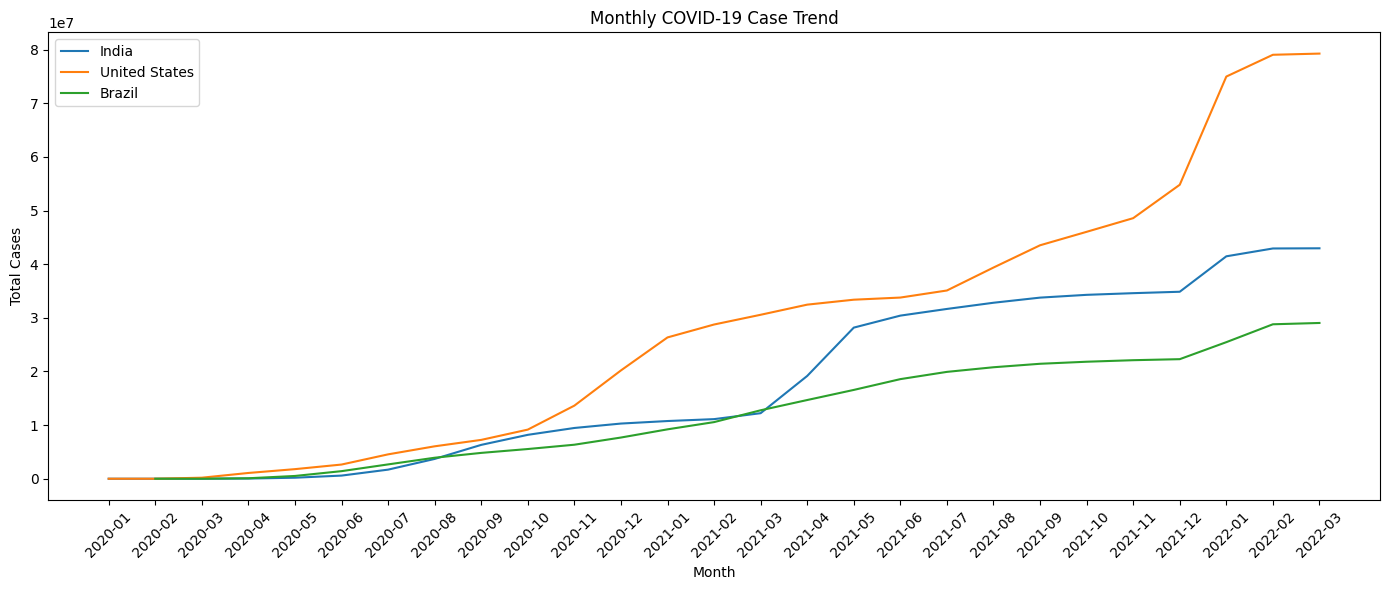

In [38]:
df_country['date'] = pd.to_datetime(df_country['date'])
df_country['month'] = df_country['date'].dt.to_period('M')

monthly = df_country.groupby(['month', 'location'])['total_cases'].max().reset_index()

plt.figure(figsize=(14,6))
for country in countries:
    data = monthly[monthly['location'] == country]
    plt.plot(data['month'].astype(str), data['total_cases'], label=country)

plt.title("Monthly COVID-19 Case Trend")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


The monthly COVID-19 line plot reveals clear patterns in case growth across different countries.
It highlights peak periods of transmission and shows which nations experienced rapid case surges. 
By simplifying the date axis to monthly intervals, the visualization makes trend comparison easier and helps identify the months of critical outbreak.

# Top Countries by Total Cases

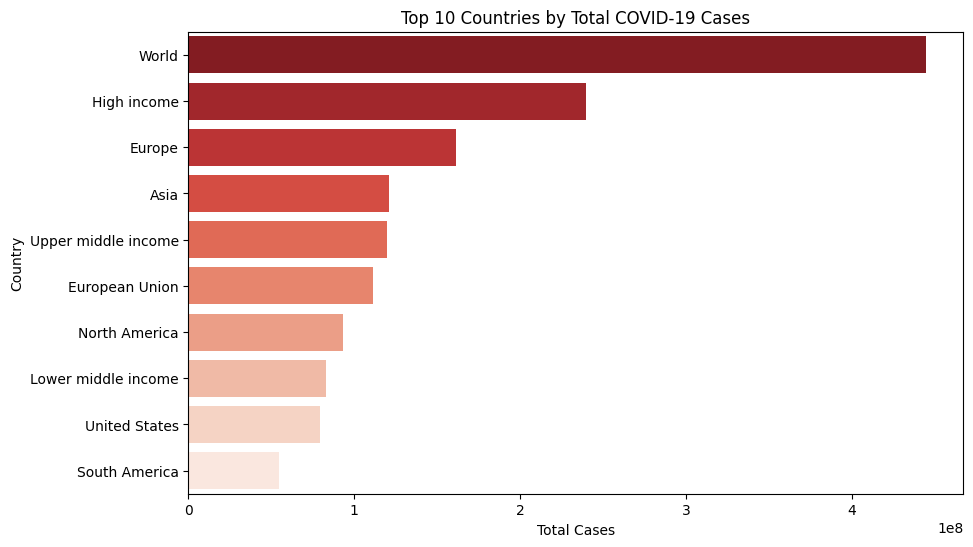

In [25]:
latest = df[df['date'] == df['date'].max()]
top_cases = latest.sort_values('total_cases', ascending=False)[['location', 'total_cases']].head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_cases, x='total_cases', y='location', palette='Reds_r')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()


The bar chart shows the top 10 countries with the highest number of total COVID-19 cases on the latest available date.
It highlights that a few countries have been significantly more affected than others.
These countries experienced larger outbreaks, possibly due to high population, urban density, or slower initial response to the virus.

#  Correlation Matrix

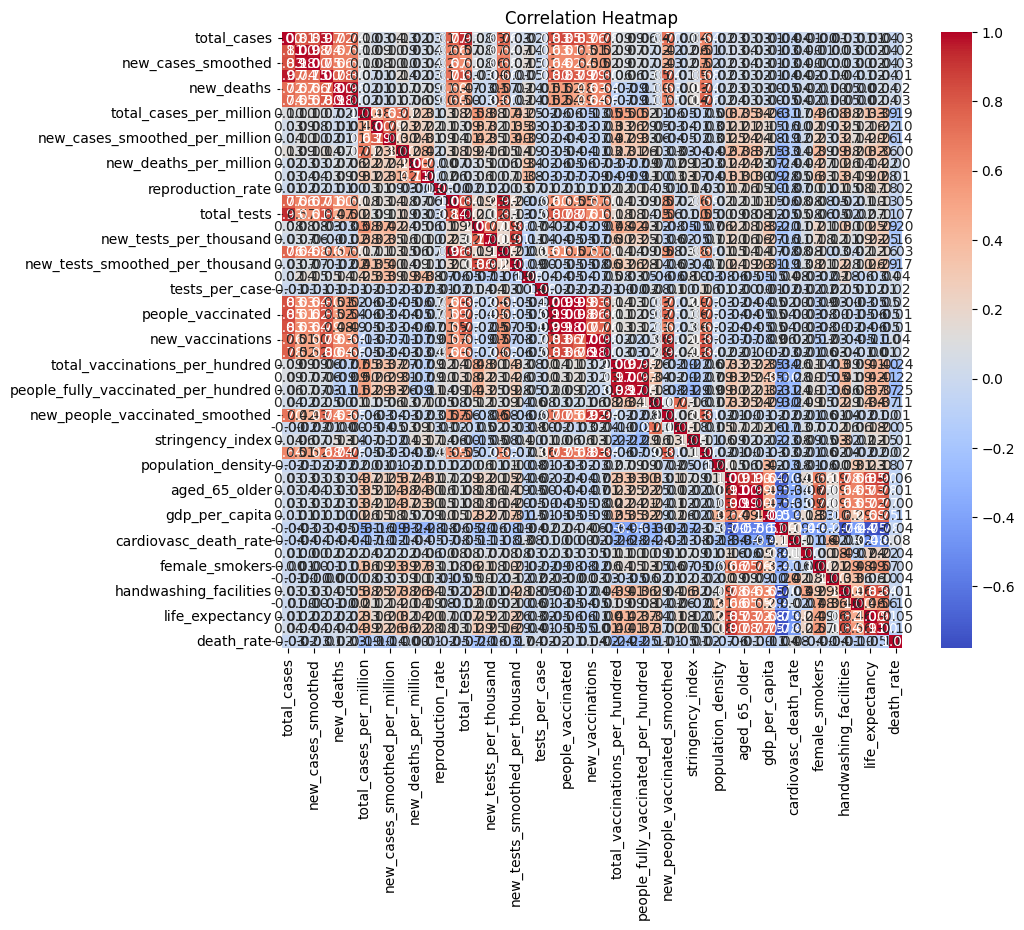

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



The correlation heatmap shows how numerical features in the COVID-19 dataset are related.
As expected, **`total_cases` and `total_deaths`** have a strong positive correlation, meaning more cases usually lead to more deaths. 
Some features may have **weak or no correlation**, indicating they vary independently.
This plot helps identify which variables move together and may be useful in further analysis or modeling.


# Check vaccination coverage for selected countries

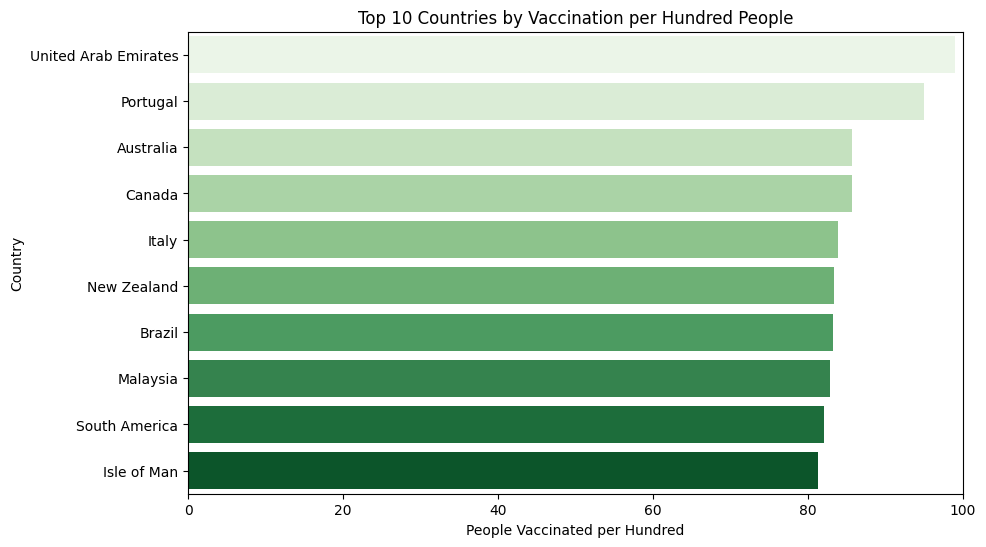

In [41]:

latest = df[df['date'] == df['date'].max()]
latest = latest.dropna(subset=['people_vaccinated_per_hundred'])
top_vaccinated = latest.sort_values('people_vaccinated_per_hundred', ascending=False).head(10)  # Sort and take top 10

plt.figure(figsize=(10,6))
sns.barplot(data=top_vaccinated, x='people_vaccinated_per_hundred', y='location', palette='Greens')

plt.title('Top 10 Countries by Vaccination per Hundred People')
plt.xlabel('People Vaccinated per Hundred')
plt.ylabel('Country')
plt.xlim(0, 100)  # Vaccination per hundred max is 100
plt.show()


 The bar chart shows that the top 10 countries have vaccinated a **large portion of their population**, with some nearing or exceeding **100 doses per hundred people**. 
This reflects strong vaccination efforts and better access to vaccines in those countries.


# Death rate analysis

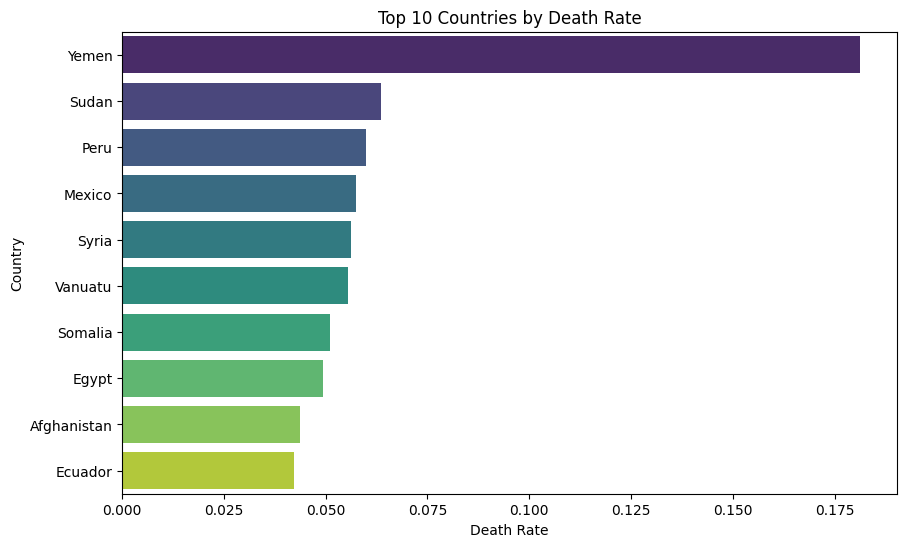

In [46]:

df['death_rate'] = df['total_deaths'] / df['total_cases']
latest = df[df['date'] == df['date'].max()]
high_death_rate = latest.sort_values('death_rate', ascending=False)[['location', 'death_rate']].dropna().head(10)



plt.figure(figsize=(10,6))
sns.barplot(data=high_death_rate, x='death_rate', y='location', palette='viridis')
plt.title('Top 10 Countries by Death Rate')
plt.xlabel('Death Rate')
plt.ylabel('Country')
plt.show()


The bar chart shows the top 10 countries with the highest COVID-19 death rates as of the most recent date.
These countries have a larger proportion of deaths compared to total cases, which may reflect factors like limited healthcare, late detection, or higher-risk populations. 
It highlights where the impact of the virus has been most severe in terms of mortality.

# CONCLUSION

Countries like the USA, India, and Brazil saw the highest number of total cases.

Vaccination rates vary greatly — some countries reached >80% vaccinated.

Correlation heatmap shows strong positive correlation between total cases and total deaths.

Some countries, despite lower total cases, have a high death rate (indicating healthcare issues or underreporting).